In [1]:
import pandas as pd
import numpy as np
import torch
import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_552722/2677601207.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
key_to_name = {
    "random": "Stiefel Random",
    "kreed": "KREED",
    "kreedXL": "KREED-XL",
    "kreedXL_proj": "KREED-XL-proj",
    "stiefelFM": "Stiefel FM",
    "stiefelFM_more1": "Stiefel FM-1",
    "stiefelFM_more2": "Stiefel FM-2",
    "stiefelFM_OT": "Stiefel FM-OT",
    "stiefelFM_OT_more1": "Stiefel FM-OT-1",
    "stiefelFM_OT_more2": "Stiefel FM-OT-2",
    "stiefelFM_filter": "Stiefel FM (filter)",
    "stiefelFM_OT_filter": "Stiefel FM-OT (filter)",
}

In [3]:
all_dicts = dict()
for key in tqdm.tqdm(["kreedXL", "kreedXL_proj", "stiefelFM", "stiefelFM_OT", "kreed", "random", "stiefelFM_filter", "stiefelFM_OT_filter",

"stiefelFM_more1", "stiefelFM_more2", "stiefelFM_OT_more1", "stiefelFM_OT_more2", # these are the extra 20 samples aggregated to 30 samples, which were filtered to 10 samples

]):
    all_dicts[key] = torch.load(f"../../samples/geom/{key}.pt")

100%|██████████| 12/12 [02:20<00:00, 11.72s/it]


In [4]:
rows = []
for ckpt in all_dicts:
    for test_set_idx in range(29203):
        for sample_idx in range(10):
            d = dict(all_dicts[ckpt][test_set_idx][sample_idx])
            d["num_atoms"] = d["coords"].shape[0]
            d.pop("coords", None)
            d["ckpt"] = ckpt
            d["test_set_idx"] = test_set_idx
            d["sample_idx"] = sample_idx
            rows.append(d)

df = pd.DataFrame(rows)

df["log_grad_norm"] = np.log10(df.grad_norm)
df["rmsd_below_25"] = df.coord_rmse < 0.25
df["rmsd_below_10"] = df.coord_rmse < 0.10

df.to_csv("geom_results.csv", index=False)

df

,moments_rmse,validity,correctness,heavy_correctness,coord_rmse,heavy_coord_rmse,grad_norm,log_grad_norm,energy,rmsd_under_pt10,rmsd_under_pt25,diversity,num_atoms,ckpt,test_set_idx,sample_idx,curve_length,rmsd_below_25,rmsd_below_10
0,10.085126,1.0,0.0,0.0,3.437253,3.269143,0.118614,-0.925863,-90.476575,0.0,0.0,2.755094,42,kreedXL,0,0,NaN,False,False
1,35.264568,1.0,0.0,0.0,2.417999,2.167748,0.153355,-0.814303,-90.406839,0.0,0.0,2.755094,42,kreedXL,0,1,NaN,False,False
2,27.240228,1.0,0.0,0.0,3.280262,2.992867,0.097665,-1.010260,-90.436776,0.0,0.0,2.755094,42,kreedXL,0,2,NaN,False,False
3,27.153097,1.0,0.0,0.0,2.639925,2.261615,0.100591,-0.997441,-90.445138,0.0,0.0,2.755094,42,kreedXL,0,3,NaN,False,False
4,40.510967,1.0,0.0,0.0,2.507189,2.432850,0.238310,-0.622857,-90.430926,0.0,0.0,2.755094,42,kreedXL,0,4,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504355,0.000024,1.0,0.0,0.0,2.256277,2.097690,0.061993,-1.207660,-80.472574,0.0,0.0,2.032776,49,stiefelFM_OT_more2,29202,5,1.363505,False,False
3504356,0.000026,0.0,0.0,0.0,1.669128,1.626410,99.312236,1.997003,-59.141504,0.0,0.0,2.032776,49,stiefelFM_OT_more2,29202,6,1.128365,False,False
3504357,0.000025,0.0,0.0,0.0,2.042753,2.053409,0.941240,-0.026300,-79.925645,0.0,0.0,2.032776,49,stiefelFM_OT_more2,29202,7,1.251818,False,False
3504358,0.000024,0.0,0.0,0.0,2.107147,2.172929,1.561837,0.193636,-79.841058,0.0,0.0,2.032776,49,stiefelFM_OT_more2,29202,8,1.542768,False,False


In [5]:
# df = pd.read_csv("geom_results.csv")

In [6]:
# Filtering procedure was performed in recalc_divs.py
# Filtering takes the 30 generated samples and filters by validity. Since this changes the grouping, this also requires recomputing diversity - originally, each row is of the same example is set to the same diversity value.

In [7]:
# Table 2

def print_table(df, order=['kreedXL', 'kreedXL_proj', 'stiefelFM', 'stiefelFM_OT']):

    table_rows = []
    for ckpt in order:
        name = key_to_name[ckpt]
        table_rows.append([name])

    grouped = df.groupby(['test_set_idx', 'ckpt'])

    means = grouped.max().rmsd_below_25.groupby('ckpt').mean()
    sems = grouped.max().rmsd_below_25.groupby('ckpt').sem()
    for i, ckpt in enumerate(order):
        table_rows[i].append(f"{(means[ckpt]*100):.2f}$\\pm${sems[ckpt]*100:.2f}")

    means = grouped.max().rmsd_below_10.groupby('ckpt').mean()
    sems = grouped.max().rmsd_below_10.groupby('ckpt').sem()
    for i, ckpt in enumerate(order):
        table_rows[i].append(f"{(means[ckpt]*100):.2f}$\\pm${sems[ckpt]*100:.2f}")

    means = grouped.mean().moments_rmse.groupby('ckpt').mean()
    for i, ckpt in enumerate(order):
        table_rows[i].append(f"{means[ckpt]:.2f}")
    
    means = grouped.mean().validity.groupby('ckpt').mean()
    for i, ckpt in enumerate(order):
        table_rows[i].append(f"{means[ckpt]:.3f}")

    means = grouped.mean().log_grad_norm.groupby('ckpt').mean()
    for i, ckpt in enumerate(order):
        table_rows[i].append(f"{means[ckpt]:.3f}")

    means = grouped.mean().diversity.groupby('ckpt').mean()
    for i, ckpt in enumerate(order):
        table_rows[i].append(f"{means[ckpt]:.3f}")

    row = ["Method", "(% < 0.25 Å)", "(% < 0.10 Å)", "Error", "Valid", "Stable", "Diverse"]
    print("| " + " | ".join(row) + " |")
    print("| " + " | ".join(["---"]*len(row)) + " |")
    for row in table_rows:
        # print(" & ".join(row) + " \\\\")
        print("| " + " | ".join(row) + " |")

print_table(df, ["random", "kreed", "kreedXL", "kreedXL_proj", "stiefelFM", "stiefelFM_OT", "stiefelFM_filter", "stiefelFM_OT_filter"])

| Method | (% < 0.25 Å) | (% < 0.10 Å) | Error | Valid | Stable | Diverse |
| --- | --- | --- | --- | --- | --- | --- |
| Stiefel Random | 0.00$\pm$0.00 | 0.00$\pm$0.00 | 0.00 | 0.000 | 0.000 | 4.104 |
| KREED | 0.04$\pm$0.01 | 0.02$\pm$0.01 | 58.36 | 0.353 | -0.583 | 2.286 |
| KREED-XL | 3.54$\pm$0.11 | 2.02$\pm$0.08 | 30.71 | 0.907 | -0.900 | 2.190 |
| KREED-XL-proj | 3.54$\pm$0.11 | 2.04$\pm$0.08 | 0.00 | 0.904 | -0.752 | 2.188 |
| Stiefel FM | 2.17$\pm$0.09 | 1.24$\pm$0.06 | 0.00 | 0.388 | -0.066 | 2.212 |
| Stiefel FM-OT | 2.44$\pm$0.09 | 1.49$\pm$0.07 | 0.00 | 0.376 | -0.002 | 2.195 |
| Stiefel FM (filter) | 3.57$\pm$0.11 | 2.06$\pm$0.08 | 0.00 | 0.889 | -0.437 | 2.183 |
| Stiefel FM-OT (filter) | 3.94$\pm$0.11 | 2.42$\pm$0.09 | 0.00 | 0.869 | -0.352 | 2.165 |


In [8]:
# extra

print_table(df, ["stiefelFM", "stiefelFM_more1", "stiefelFM_more2", "stiefelFM_OT", "stiefelFM_OT_more1", "stiefelFM_OT_more2"])

| Method | (% < 0.25 Å) | (% < 0.10 Å) | Error | Valid | Stable | Diverse |
| --- | --- | --- | --- | --- | --- | --- |
| Stiefel FM | 2.17$\pm$0.09 | 1.24$\pm$0.06 | 0.00 | 0.388 | -0.066 | 2.212 |
| Stiefel FM-1 | 2.08$\pm$0.08 | 1.25$\pm$0.06 | 0.00 | 0.389 | -0.067 | 2.210 |
| Stiefel FM-2 | 2.15$\pm$0.08 | 1.33$\pm$0.07 | 0.00 | 0.390 | -0.071 | 2.209 |
| Stiefel FM-OT | 2.44$\pm$0.09 | 1.49$\pm$0.07 | 0.00 | 0.376 | -0.002 | 2.195 |
| Stiefel FM-OT-1 | 2.28$\pm$0.09 | 1.41$\pm$0.07 | 0.00 | 0.376 | -0.003 | 2.194 |
| Stiefel FM-OT-2 | 2.29$\pm$0.09 | 1.40$\pm$0.07 | 0.00 | 0.375 | -0.001 | 2.194 |


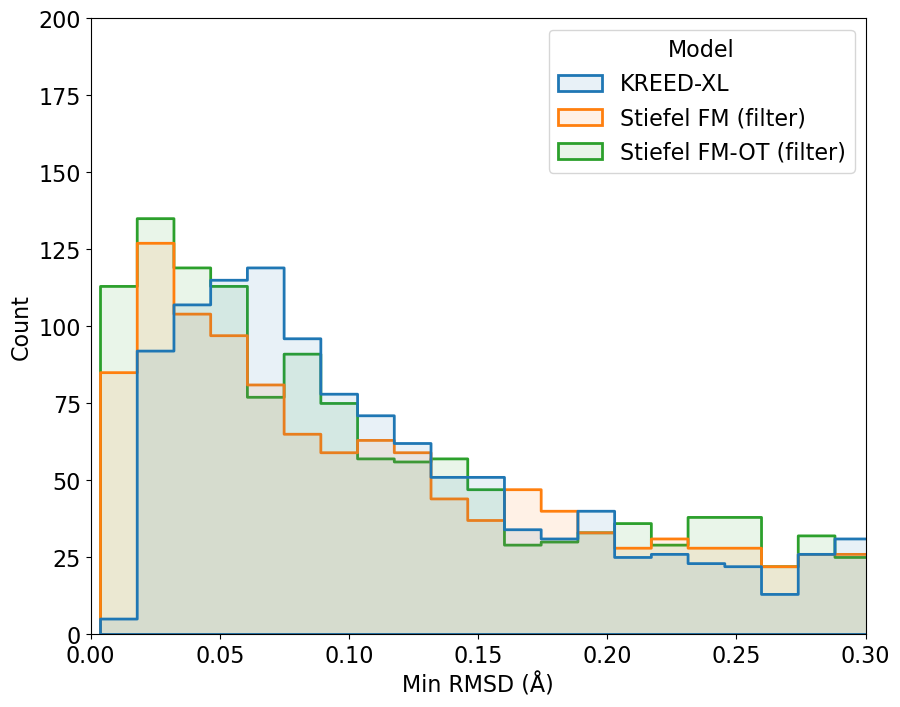

In [9]:
# Figure 4

subdf = df
subdf = subdf.groupby(["test_set_idx", "ckpt"]).min().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 8))

# increase font size
plt.rcParams.update({'font.size': 16})

order = ["kreedXL", "stiefelFM_filter", "stiefelFM_OT_filter"]
hue_order = [key_to_name[key] for key in order]

subdf["Model"] = subdf["ckpt"].map(key_to_name)
# Plot histogram of coord_rmse with different ckpt on the same plot
sns.histplot(data=subdf, x="coord_rmse", hue="Model", bins=800, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

# Add labels and title
plt.xlabel("Min RMSD (Å)")
plt.ylabel("Count")

plt.xlim([-.3, 5.9])

plt.savefig("geom_rmsd_hist.png", bbox_inches='tight', dpi=300)

# Set x-axis limits
plt.xlim([0, 0.3])
plt.ylim([0, 200])

plt.savefig("geom_rmsd_hist_zoom.png", bbox_inches='tight', dpi=300)

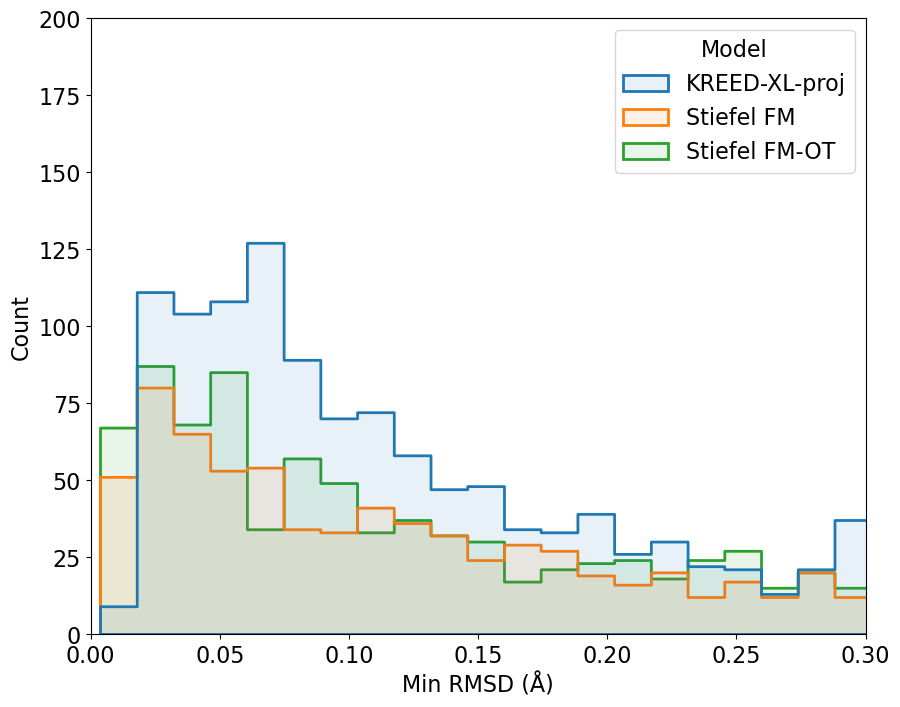

In [10]:
# extra

subdf = df
subdf = subdf.groupby(["test_set_idx", "ckpt"]).min().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 8))

# increase font size
plt.rcParams.update({'font.size': 16})

order = ["kreedXL_proj", "stiefelFM", "stiefelFM_OT"]
hue_order = [key_to_name[key] for key in order]

subdf["Model"] = subdf["ckpt"].map(key_to_name)
# Plot histogram of coord_rmse with different ckpt on the same plot
sns.histplot(data=subdf, x="coord_rmse", hue="Model", bins=800, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

# Add labels and title
plt.xlabel("Min RMSD (Å)")
plt.ylabel("Count")

# Set x-axis limits
plt.xlim([0, 0.3])
plt.ylim([0, 200]);

In [11]:
curve_len = df.groupby(['test_set_idx', 'ckpt']).mean().curve_length.groupby('ckpt').mean()
print(f"Stiefel FM curve length: {curve_len.stiefelFM:.3f}")
print(f"Stiefel FM-OT curve length: {curve_len.stiefelFM_OT:.3f}")

curve_len

Stiefel FM curve length: 1.421
Stiefel FM-OT curve length: 1.344


ckpt
kreed                       NaN
kreedXL                     NaN
kreedXL_proj                NaN
random                      NaN
stiefelFM              1.420831
stiefelFM_OT           1.344124
stiefelFM_OT_filter    1.372777
stiefelFM_OT_more1     1.343841
stiefelFM_OT_more2     1.344068
stiefelFM_filter       1.452683
stiefelFM_more1        1.421044
stiefelFM_more2        1.421451
Name: curve_length, dtype: float64

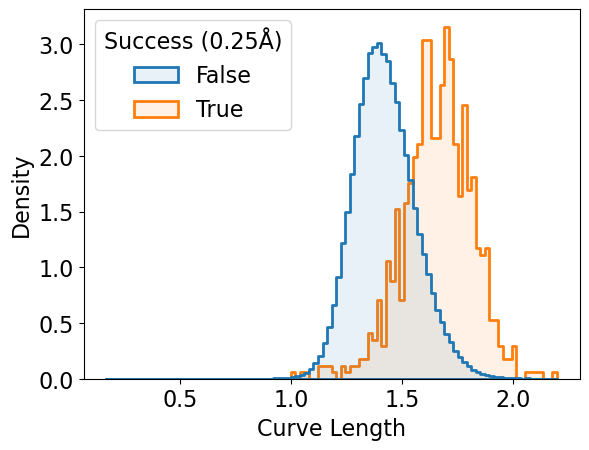

In [12]:
# Figure 7, right

plt.rcParams.update({'font.size': 16})
df["Success (0.25Å)"] = df.coord_rmse < 0.25
ax = sns.histplot(df[df.ckpt == "stiefelFM"], x="curve_length", hue="Success (0.25Å)", element="step", fill=True, alpha=0.1, bins=100, linewidth=2, stat="density", common_norm=False)
plt.xlabel("Curve Length")
# move legend to top left
sns.move_legend(ax, 'upper left');
plt.savefig("geom_biased.pdf", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


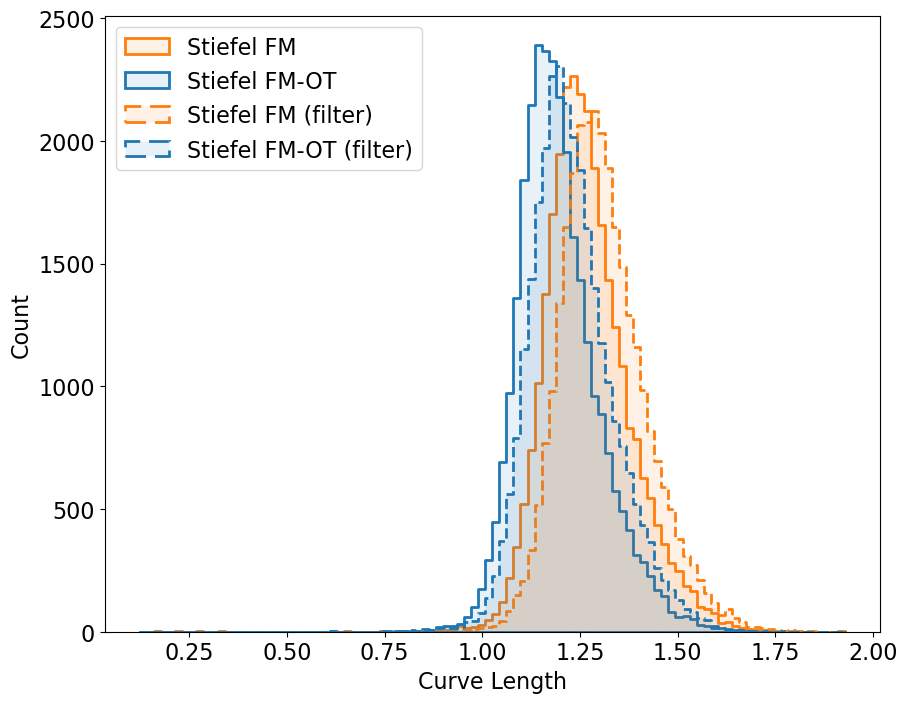

In [13]:
# Figure 8

plt.figure(figsize=(10, 8))

subdf["Model"] = subdf["ckpt"].map(key_to_name)

# Plot histogram of coord_rmse with different ckpt on the same plot
hue_order = ["Stiefel FM-OT", "Stiefel FM"]
sns.histplot(data=subdf, x="curve_length", hue="Model", bins=100, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

hue_order = ["Stiefel FM-OT (filter)", "Stiefel FM (filter)", ]
sns.histplot(data=subdf, x="curve_length", hue="Model", bins=100, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2, linestyle="--")

# Add labels and title
plt.xlabel("Curve Length")
plt.ylabel("Count")

# move legend to top left
# sns.move_legend(plt.gca(), "upper left")

# remove legend
plt.legend().remove()

# manually create legend
plt.legend(["Stiefel FM", "Stiefel FM-OT", "Stiefel FM (filter)", "Stiefel FM-OT (filter)"], loc="upper left")

plt.savefig("geom_curve_length.png", bbox_inches='tight', dpi=300)

In [14]:
num = len(set(df[df.ckpt.isin(["kreedXL", "stiefelFM_filter", "stiefelFM_OT_filter"]) & (df.coord_rmse < 0.25)].test_set_idx))
den = len(set(df.test_set_idx))
print(f"Success rate: {num}/{den} = {num/den}")

Success rate: 2297/29203 = 0.07865630243468137
